<a href="https://colab.research.google.com/github/LuizPaulo97/atividades-mackenzie/blob/main/An%C3%A1lise_Explorat%C3%B3ria_de_Dados_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Atividade de Aprofundamento 2 - Análise Exploratória de Dados 1
Aluno: Luiz Paulo de Lima Pacheco

Diante da riqueza de dados disponível no site Gapminder, foi optado por fazer uma análise social e econômica do cenário Brasileiro considerando o período entre 1960 e 2019 (último ano disponível). Com isso, foram analisados alguns indicadores de relevância como mortalidade infantil, índice de Gini, PIB Per Capita, Expectativa de Vida e Taxa de Inflação ao longo dos anos. Com tais indicadores, é possível realizar um mapeamento do cenário brasileiro ao longo dos anos.

## **Explorando a Estrutura dos Dados**

Foram escolhidos cinco indicadores para o estudo. Cada indicador foi importado como arquivo .csv e sofreram tratamentos em seus dataframes: filtro de período temporal e filtro de seleção do país (Brasil) conforme mostrado abaixo. Também foram realizados sucessivos joins (merges) entre os dataframes para a construção de um dataframe geral, chamado indicadores. 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

In [ ]:
#Importando o dataframe com o nível de Mortalidade Infantil a cada 1000 nascidos
mortalidade = pd.read_csv('https://raw.githubusercontent.com/LuizPaulo97/luiz-paulo-pacheco/main/child_mortality_0_5_year_olds_dying_per_1000_born.csv')
mortalidade = pd.melt(mortalidade, id_vars=['country'])
mortalidade = mortalidade.rename(columns={'variable':'year','value':'mortalidade_infantil'})
filtro1 = mortalidade[mortalidade['year']>'1959']
filtro1a = filtro1[(filtro1['year']<'2020') & (filtro1['country']=='Brazil')].reset_index(drop=True)
#display(filtro1a.head())

#Importando o dataframe com o índice de Gini (indicador de desigualdade social - concentração de riquezas)
gini = pd.read_csv('https://raw.githubusercontent.com/LuizPaulo97/luiz-paulo-pacheco/main/gini.csv')
gini = pd.melt(gini,id_vars=['country'])
gini = gini.rename(columns={'variable':'year','value':'gini'})
filtro2 = gini[gini['year']>'1959']
filtro2a = filtro2[(filtro2['year']<'2020') & (filtro2['country']=='Brazil')].reset_index(drop=True)
#display(filtro2a.head())

#Importando o dataframe com a expectativa de vida da população  
expectativa_de_vida = pd.read_csv('https://raw.githubusercontent.com/LuizPaulo97/luiz-paulo-pacheco/main/life_expectancy_years.csv')
expectativa_de_vida = pd.melt(expectativa_de_vida,id_vars=['country'])
expectativa_de_vida = expectativa_de_vida.rename(columns={'variable':'year','value':'expectativa_de_vida'})
filtro3 = expectativa_de_vida[expectativa_de_vida['year']>'1959']
filtro3a = filtro3[(filtro3['year']<'2020') & (filtro3['country']=='Brazil')].reset_index(drop=True)
#display(filtro3a.head())

#Importando o dataframe com o PIB per Capita ajustado à inflação
pib = pd.read_csv('https://raw.githubusercontent.com/LuizPaulo97/luiz-paulo-pacheco/main/gdppercapita_us_inflation_adjusted.csv')
pib = pd.melt(pib,id_vars=['country'])
pib = pib.rename(columns={'variable':'year','value':'pib_per_capita'})
filtro4 = pib[pib['year']>'1959']
filtro4a = filtro4[(filtro4['year']<'2020') & (filtro4['country']=='Brazil')].reset_index(drop=True)
#display(filtro4a.head())

#Importando o dataframe com o índice de Inflação
inflacao = pd.read_csv('https://raw.githubusercontent.com/LuizPaulo97/luiz-paulo-pacheco/main/inflation_annual_percent.csv')
inflacao = pd.melt(inflacao,id_vars=['country'])
inflacao = inflacao.rename(columns={'variable':'year','value':'inflacao_anual'})
filtro5 = inflacao[inflacao['year']>'1959']
filtro5a = filtro5[(filtro5['year']<'2020') & (filtro5['country']=='Brazil')].reset_index(drop=True)
#display(filtro5a.head())

#Fazendo o join entre mortalidade infantil no Brasil e indice de gini no Brasil
filtro1a = pd.merge(filtro1a,filtro2a[['year','gini']], on = 'year')
#Fazendo o join entre o dataframe anterior e o índice de Expectativa de Vida no Brasil
filtro3a = pd.merge(filtro1a,filtro3a[['year','expectativa_de_vida']], on = 'year')
#Fazendo o join entre o dataframe anterior e o PIB Per Capita no Brasil
filtro4a = pd.merge(filtro3a,filtro4a[['year','pib_per_capita']], on = 'year')
#Fazendo o join entre o dataframe anterior e a inflação anual no Brasil
indicadores = pd.merge(filtro4a,filtro5a[['year','inflacao_anual']], on = 'year')
display(indicadores.head())

data_types_dict = {'pib_per_capita':float}
indicadores = indicadores.astype(data_types_dict)
data_types_dict = {'inflacao_anual':float}
indicadores = indicadores.astype(data_types_dict)
indicadores['year'] = pd.to_datetime(indicadores['year'], errors='coerce').dt.year
display(indicadores.dtypes)


,country,year,mortalidade_infantil,gini,expectativa_de_vida,pib_per_capita,inflacao_anual
0,Brazil,1960,165.0,55.7,53.0,2820,31.3
1,Brazil,1961,160.0,56.1,53.5,2880,78.8
2,Brazil,1962,156.0,56.5,54.0,2830,69.8
3,Brazil,1963,152.0,56.8,54.4,2840,93.8
4,Brazil,1964,148.0,57.1,54.8,2850,51.4


country                  object
year                      int64
mortalidade_infantil    float64
gini                    float64
expectativa_de_vida     float64
pib_per_capita          float64
inflacao_anual          float64
dtype: object

## **Verificando a Qualidade dos Dados**

Nesta etapa, inicialmente foi feita uma análise acerca da qualidade dos dados, visando observar se havia algum dado nulo.

In [ ]:
print(indicadores.isnull().sum())

country                 0
year                    0
mortalidade_infantil    0
gini                    0
expectativa_de_vida     0
pib_per_capita          0
inflacao_anual          0
dtype: int64


Observando-se a qualidade dos dados, foi calculado também um resumo com as estatísticas relevantes para cada atributo.

In [ ]:
print(indicadores.describe())

              year  mortalidade_infantil       gini  expectativa_de_vida  \
count    60.000000             60.000000  60.000000            60.000000   
mean   1989.500000             70.810000  56.981667            66.213333   
std      17.464249             48.480612   2.502913             7.128469   
min    1960.000000             13.500000  51.900000            53.000000   
25%    1974.750000             24.500000  55.425000            60.250000   
50%    1989.500000             61.600000  57.850000            67.600000   
75%    2004.250000            113.000000  58.400000            72.875000   
max    2019.000000            165.000000  63.300000            75.800000   

       pib_per_capita  inflacao_anual  
count       60.000000       60.000000  
mean      6213.666667      209.012167  
std       1873.774372      540.193229  
min       2820.000000        3.670000  
25%       5497.500000        7.917500  
50%       6410.000000       24.700000  
75%       7402.500000       90.5750

## **Qual foi o ano com a maior taxa de mortalidade infantil e nível de desigualdade (medido pelo índice de Gini)? Como se deu a evolução anual desses indicadores?**

In [ ]:
indicadores.loc[indicadores.mortalidade_infantil.nlargest(1).index][['year','mortalidade_infantil']]

,year,mortalidade_infantil
0,1960,165.0


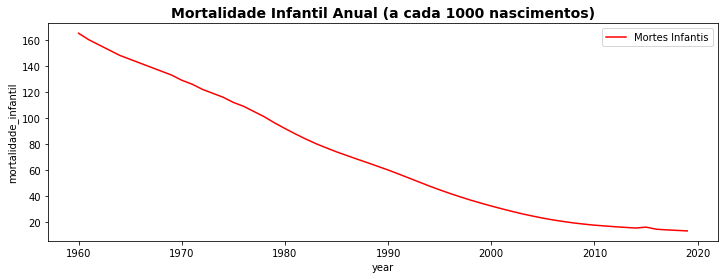

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x=indicadores.year, y= indicadores.mortalidade_infantil, label = 'Mortes Infantis', color = 'r')
plt.title('Mortalidade Infantil Anual (a cada 1000 nascimentos)',fontsize=14,weight='bold')
plt.legend()
plt.show()

Como observado no gráfico, o ano de 1960 foi o ano com a maior taxa de mortalidade infantil da amostra. É possível destacar ainda na evolução que o período entre as décadas de 60 e 70 registraram a maior taxa de mortalidade infantil na história recente.

In [ ]:
indicadores.loc[indicadores.gini.nlargest(1).index][['year','gini']]

,year,gini
28,1988,63.3


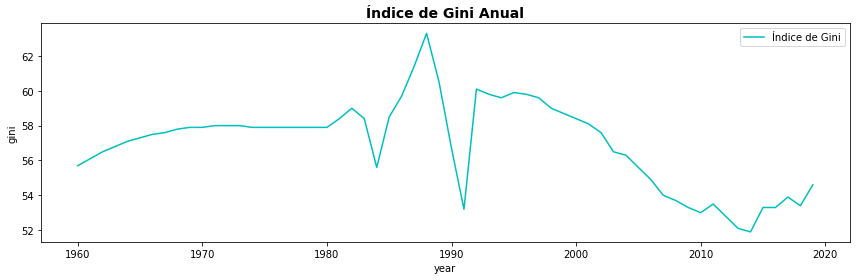

In [ ]:
plt.figure(figsize=(12,4))
sns.lineplot(x=indicadores.year, y= indicadores.gini, label = 'Índice de Gini', color ='c')
plt.title('Índice de Gini Anual',fontsize=14,weight='bold')
plt.legend()

plt.tight_layout()
plt.show()

Com os dados acima, é possível inferir que mais próximo do fim da década de 80 e o início da década de 90 marcou o momento de maior desigualdade financeira no Brasil, com o ano de 1988 sendo o pior momento (índice de Gini = 63,3%).

## **Com base nos dados, como se comportam as tendências da inflação anual (%) e do PIB Per Capita Anual nos últimos 10 anos ?**

Para essa análise de tendência, foram plotados dois gráficos de regressão linear: um pra inflação anual (%) e outro pro PIB Per Capita. Assim, é possível identificar e fazer possíveis projeções de cenários.

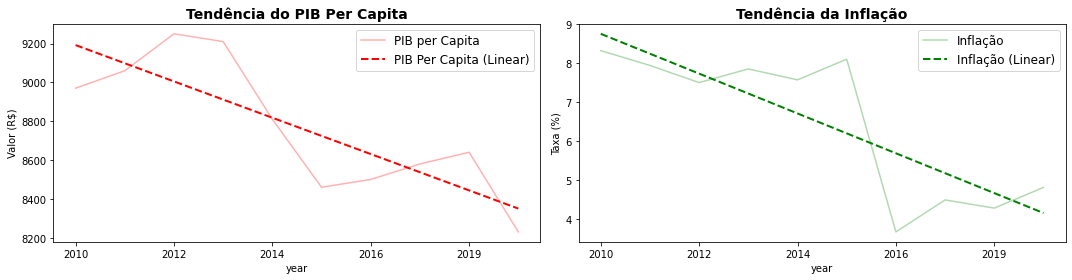

In [ ]:
#criando um novo dataframe com dados a partir de 2010
indicadores1 = indicadores[indicadores['year']>2009] 
indicadores1.index

#Plotando o gráfico do PIB
plt.figure(figsize=(15,4))
ax = plt.subplot(1,2,1)
ax.plot(indicadores1.index, indicadores1.pib_per_capita, color = 'r', label='PIB per Capita', alpha = 0.3)

ax.set_title('Tendência do PIB Per Capita', fontsize=14, weight='bold')
ax.set_xlabel("year")
ax.set_ylabel("Valor (R$)")

z = np.polyfit(indicadores1.index,indicadores1.pib_per_capita, 1)
p = np.poly1d(z)
ax.plot(indicadores1.index,p(indicadores1.index), linestyle='dashed', label='PIB Per Capita (Linear)' ,linewidth=2, color='r')

ax.legend(fontsize=12)

import matplotlib.ticker as ticker
ax.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax.set_xticklabels(['',indicadores.iloc[50].year,indicadores.iloc[52].year,indicadores.iloc[54].year,indicadores.iloc[56].year,indicadores.iloc[59].year])

#Plotando o Gráfico de Inflação
ax2 = plt.subplot(1,2,2)
ax2.plot(indicadores1.index,indicadores1.inflacao_anual, color = 'g', label='Inflação', alpha = 0.3)
ax2.set_title('Tendência da Inflação', fontsize=14, weight='bold')
ax2.set_xlabel("year")
ax2.set_ylabel("Taxa (%)")

z = np.polyfit(indicadores1.index,indicadores1.inflacao_anual, 1)
p = np.poly1d(z)
ax2.plot(indicadores1.index,p(indicadores1.index), linestyle='dashed', label='Inflação (Linear)' ,linewidth=2, color='g')

ax2.legend(fontsize=12)

import matplotlib.ticker as ticker
ax2.xaxis.set_major_locator(ticker.MaxNLocator(5))
ax2.set_xticklabels(['',indicadores.iloc[50].year,indicadores.iloc[52].year,indicadores.iloc[54].year,indicadores.iloc[56].year,indicadores.iloc[59].year])

plt.tight_layout()
plt.show()

A partir da análise dos gráficos, observa-se que tanto o PIB Per Capita quanto a Inflação Anual apresentaram uma tendência de queda nos últimos 10 anos. O PIB por sua vez registrou uma queda relativamente mais lenta e em menor proporção, se comparado com a taxa de inflação que apresentou uma queda de mais de 50% em 2016, embora tenha voltado a aumentar em 2019.

##**Existe correlação entre Índice de Gini e PIB Per Capita?**

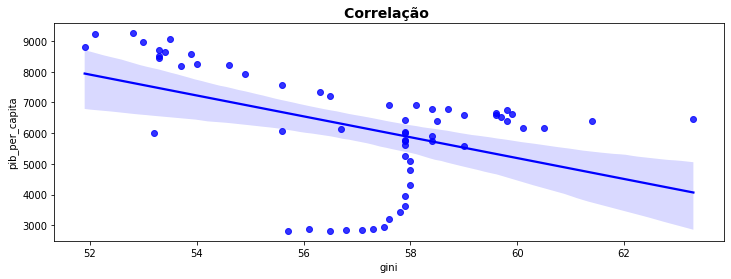

In [ ]:
plt.figure(figsize=(12,4))
sns.regplot(x='gini', y='pib_per_capita', data=indicadores, color = 'b')
plt.title('Correlação ',fontsize=14,weight='bold')

plt.show()

In [ ]:
correlacao = indicadores[['gini','pib_per_capita']].corr(method='pearson')
print(correlacao)

                    gini  pib_per_capita
gini            1.000000       -0.453358
pib_per_capita -0.453358        1.000000


Como já era esperado, o índice de Gini e o PIB Per Capita apresentam **correlação negativa (~ -0,45**). Isso ocorre, pois como citado anteriormente, o índice de Gini reflete o nível de desigualdade econômica no país. Logo, quanto menor for o PIB Per Capita, maior será o índice de Gini, e assim vice e versa.

## **Como se compara a distribuição da expectativa de vida nos últimos 30 anos no Brasil, em relação ao período anterior?**

Para se ter uma visão completa, é interessante realizar uma análise de um gráfico boxplot, comparando ambos os períodos.

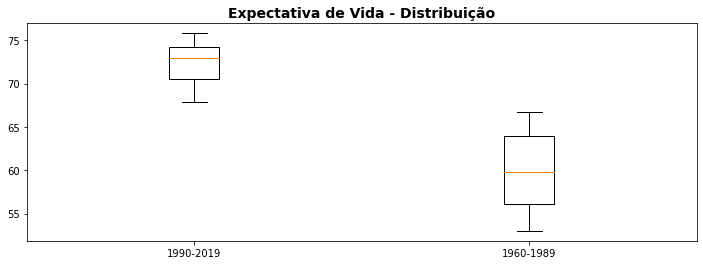

In [ ]:
plt.figure(figsize=(12,4))
plt.boxplot(indicadores[indicadores.year >1989].expectativa_de_vida,positions=[1],showfliers=False)
plt.boxplot(indicadores[indicadores.year <1989].expectativa_de_vida,positions=[2],showfliers=False)
plt.title('Expectativa de Vida - Distribuição', fontsize = 14, weight = 'bold')
plt.xticks(ticks=[1,2], labels=['1990-2019','1960-1989'])
plt.show()

In [ ]:
indicadores[indicadores.year <1989].expectativa_de_vida.mean()

59.82758620689654

Como observado no gráfico, a expectativa de vida nos últimos 30 anos (1990-2019) melhorou no comparativo com o período anterior. A expectativa de vida atual, em média é de 73 anos, enquanto no período anterior, a expectativa média era de 60 anos. Além disso, as pessoas no período mais atual podem alcançar e superar 75 anos. Já no período entre 1960 e 1989, a expectativa máxima de vida era em torno de 65 anos.

## **Nos últimos 10 anos, o Brasil teve um nível de desigualdade superior à média histórica?**

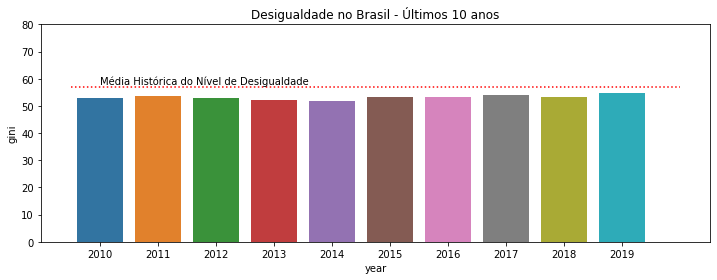

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=indicadores[indicadores.year >2009].year, y=indicadores.gini)
plt.title('Desigualdade no Brasil - Últimos 10 anos')
plt.hlines(indicadores.gini.mean(),-0.5,10,color='r',linestyles=':')
plt.text(0, indicadores.gini.mean()+1,'Média Histórica do Nível de Desigualdade')
plt.xticks(rotation=0)
plt.ylim([0,80])
plt.show()


Como mostrado no gráfico de barras acima, no comparativo com a média histórica da amostra, o Brasil tem registrado índice inferior de desigualdade, o que significa uma melhora de cenário. Entretanto, registam valores próximos a 50% e registra também um leve aumento no indicador em 2019.

## **Nos últimos 10 anos, o PIB Per Capita no Brasil foi inferior à média histórica, desde 1960?**

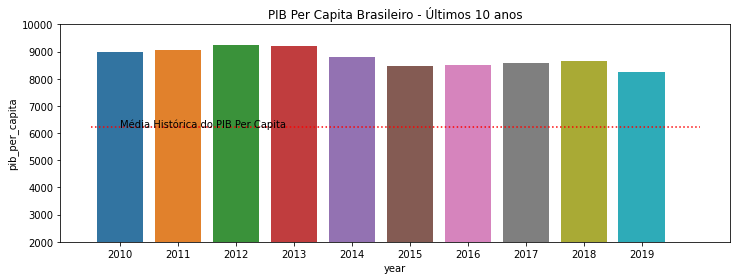

In [ ]:
plt.figure(figsize=(12,4))
sns.barplot(x=indicadores[indicadores.year >2009].year, y=indicadores.pib_per_capita)
plt.title('PIB Per Capita Brasileiro - Últimos 10 anos')
plt.hlines(indicadores.pib_per_capita.mean(),-0.5,10,color='r',linestyles=':')
plt.text(0, indicadores.pib_per_capita.mean()+1,'Média Histórica do PIB Per Capita')
plt.xticks(rotation=0)
plt.ylim([2000,10000])
plt.show()

Como mostrado no gráfico de barras acima, no comparativo com a média histórica, o Brasil tem registrado um valor bem superior de PIB Per Capita (corrigido a inflação), indicando também uma melhora no quadro socioeconômico do país.

## **Conclusão**

Com os indicadores selecionados para construção do dataframe, seria possível realizar diversos outros tipos de análise. Entretanto, como o objetivo deste trabalho era realizar uma análise temporal e comparativa do cenário social brasileiro desde a década de 60 por meio de alguns indicadores socioeconômicos, foi possível obter alguns resultados

Conforme observado, tanto a taxa de mortalidade infantil quanto o índice de Gini (desigualdade) apresentaram queda ao longo do tempo, confirmando uma melhora no quadro social nestes pontos. Conforme esperado, observou-se também que o índice de Gini e o PIB Per Capita possuem uma correlação negativa e portanto, conclui-se que, a melhora no quadro social também está relacionada ao crescimento do PIB Per Capita. Percebe-se também um crescimento na expectativa de vida da população, quando se comparado os últimos 30 anos com os 30 anos prévios.


Entretanto, considerando um recorte temporal mais recente (2009-2019), percebe-se que é necessário ter atenção ao PIB Per Capita, que embora tenha sido superior à média histórica da amostra, está em uma tendência de queda. Por outro lado, o índice de Gini neste mesmo recorte temporal, tem atingido valores inferiores à média histórica e a inflação também registrou uma tendência de queda.